In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/binary_classification_test.csv')

Mounted at /content/drive


In [4]:
train_size = int(0.8 * len(df_train))
train_data = df_train[:train_size]
test_data = df_train[train_size:]
print(train_size)


1431


In [5]:
df_train_x = train_data.iloc[:, 1:-1]
df_train_y = train_data.iloc[:, -1].values.reshape(-1, 1)
print(df_train_x.shape)
print(df_train_y.shape)

(1431, 20)
(1431, 1)


In [6]:
df_test_x = test_data.iloc[:, 1:-1]
df_test_y = test_data.iloc[:, -1].values.reshape(-1, 1)

In [7]:
df_train_x_normalized = (df_train_x - df_train_x.mean()) / df_train_x.std()
df_test_x_normalized = (df_test_x - df_train_x.mean()) / df_train_x.std()

In [8]:
x_train = np.hstack((np.ones((df_train_x_normalized.shape[0], 1)), df_train_x_normalized))
x_test = np.hstack((np.ones((df_test_x_normalized.shape[0], 1)), df_test_x_normalized))
y_train = df_train_y
y_test = df_test_y

In [9]:
iterations = 50000
learning_rate = 0.01
m_train = x_train.shape[0]
w = np.zeros((x_train.shape[1], 1))


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def cost(x, y, w):
    z = np.dot(x, w)
    y_pred = sigmoid(z)
    j = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
    return j

In [12]:
def grad(x, y , w, learning_rate, iterations):
    j_hist = []
    for _ in range(iterations):
        z = np.dot(x, w)
        y_pred = sigmoid(z)
        error = y_pred - y
        dj_dw = (1 / m_train) * np.dot(x.T, error)
        w = w - learning_rate * dj_dw
        j = cost(x, y, w)
        j_hist.append(j)
    return w, j_hist , y_pred

In [13]:
w, j_hist, y_pred = grad(x_train, y_train, w, learning_rate, iterations)

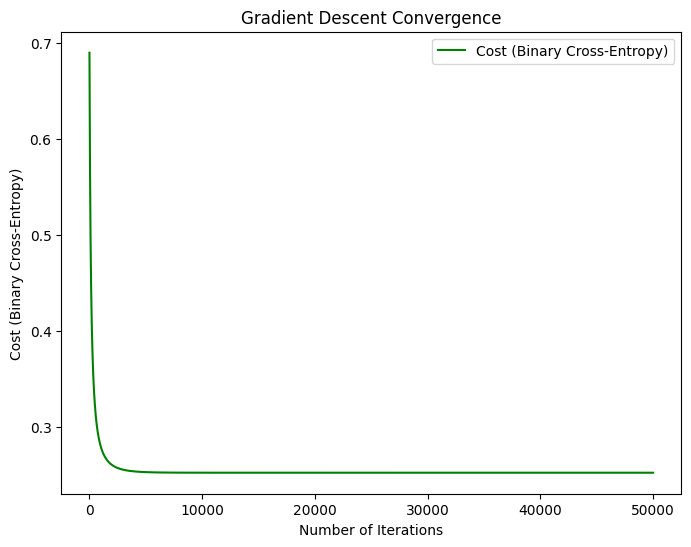

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), j_hist, label='Cost (Binary Cross-Entropy)', color='green')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Binary Cross-Entropy)')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.show()

In [15]:
z_test = np.dot(x_test, w)
y_pred_test = sigmoid(z_test)


In [16]:
def compute_metrics(y_pred, y_test, threshold):
    y_pred_labels = (y_pred >= threshold).astype(int)
    TP = np.sum((y_pred_labels == 1) & (y_test == 1))
    FP = np.sum((y_pred_labels == 1) & (y_test == 0))
    FN = np.sum((y_pred_labels == 0) & (y_test == 1))
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

In [17]:
thresholds = np.arange(0.1, 0.9, 0.1)
f1_scores = []

In [18]:
for threshold in thresholds:
    precision, recall, f1 = compute_metrics(y_pred_test, y_test, threshold)
    f1_scores.append(f1)

In [19]:
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Highest F1 Score: {f1_scores[optimal_threshold_index]:.4f}")

Optimal Threshold: 0.40
Highest F1 Score: 0.9038


In [20]:
x_test_separate_1 = df_test.iloc[:, 1:]
x_test_normalized = (x_test_separate_1 - df_train_x.mean()) / df_train_x.std()
x_test_separate = np.hstack((np.ones((x_test_normalized.shape[0], 1)), x_test_normalized))

In [21]:
z_separate = np.dot(x_test_separate, w)
y_pred_separate = sigmoid(z_separate)

In [22]:
threshold_separate = 0.4
y_pred_separate_labels = (y_pred_separate >= threshold_separate).astype(int) #alternatively i could've written y_pred_separate_labels = np.where(y_pred > threshold, 1, 0)

In [23]:
separate_results_df = pd.DataFrame({
    'y_pred_probabilities': y_pred_separate.flatten(),
    'y_pred_labels': y_pred_separate_labels.flatten()
})

In [24]:
print(separate_results_df.head())


   y_pred_probabilities  y_pred_labels
0              0.061888              0
1              0.316608              0
2              0.016643              0
3              0.142117              0
4              0.071856              0


In [27]:
y_pred_separate = pd.DataFrame(y_pred_separate, columns=['Predicted_Probabilities'])
y_pred_separate.to_csv('Binary_Prediction_probabilities.csv', index=False)
print(os.getcwd())
files.download('/content/Binary_Prediction_probabilities.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
y_pred_separate_labels = pd.DataFrame(y_pred_separate_labels, columns=['Predicted_Probabilities'])
y_pred_separate_labels.to_csv('Binary_Prediction_labels.csv', index=False)
print(os.getcwd())
files.download('/content/Binary_Prediction_labels.csv')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>